In [ ]:
%cd ..

In [15]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import math
import os
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode
import random

from joblib import Parallel, delayed
from tqdm import tqdm

In [16]:
def find_fonts(directory, extensions=['.ttf', '.otf']):
    font_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.endswith(ext) for ext in extensions):
                font_paths.append(os.path.join(root, file))
    return font_paths

In [17]:
def get_glyphs(font_path):
    font = TTFont(font_path)
    cmap = font.getBestCmap()
    glyphs = []
    for code, _ in cmap.items():
        symbol = chr(code)
        if symbol in [' ', '']:
            continue
        glyphs.append(symbol)
    return glyphs



In [18]:
directory = 'fonts'  # Замените на путь к вашей директории
font_paths = find_fonts(directory)
font_paths

['fonts/Aguante/Aguante-Regular.otf',
 'fonts/Ghastly Panic/GhastlyPanicCyr.otf',
 'fonts/Brass Mono/BrassMono-Regular.ttf',
 'fonts/Brass Mono/BrassMono-Italic.ttf',
 'fonts/Brass Mono/BrassMono-BoldItalic.ttf',
 'fonts/Brass Mono/BrassMono-Bold.ttf',
 'fonts/Better VCR/better-vcr-5.2.ttf',
 'fonts/Sans Collegiate One/AlumniSansCollegiateOne-Italic.ttf',
 'fonts/Sans Collegiate One/AlumniSansCollegiateOne-Regular.ttf',
 'fonts/Ganesha Type/GaneshaType-Regular.ttf',
 'fonts/Tana Uncial SP/TanaUncialSP.otf',
 'fonts/Realest/Realest-Extended.otf',
 'fonts/Aref Ruqaa Ink/ArefRuqaaInk-Regular.ttf',
 'fonts/Aref Ruqaa Ink/ArefRuqaaInk-Bold.ttf',
 'fonts/Ambidexter/ambidexter_regular.otf']

In [19]:
def get_font_name(font_path):
    base_name = os.path.basename(font_path)  # Получаем имя файла
    font_name = os.path.splitext(base_name)[0]  # Удаляем расширение
    return font_name

In [20]:
get_font_name(font_paths[1])

'GhastlyPanicCyr'

In [21]:
 # Замените на путь к вашему файлу шрифта
glyphs = get_glyphs(font_paths[0])
for symbol in glyphs:
    print(f'Symbol: {symbol}')

Symbol: !
Symbol: "
Symbol: #
Symbol: $
Symbol: &
Symbol: '
Symbol: (
Symbol: )
Symbol: *
Symbol: +
Symbol: ,
Symbol: -
Symbol: .
Symbol: /
Symbol: 0
Symbol: 1
Symbol: 2
Symbol: 3
Symbol: 4
Symbol: 5
Symbol: 6
Symbol: 7
Symbol: 8
Symbol: 9
Symbol: :
Symbol: ;
Symbol: <
Symbol: =
Symbol: >
Symbol: ?
Symbol: @
Symbol: A
Symbol: B
Symbol: C
Symbol: D
Symbol: E
Symbol: F
Symbol: G
Symbol: H
Symbol: I
Symbol: J
Symbol: K
Symbol: L
Symbol: M
Symbol: N
Symbol: O
Symbol: P
Symbol: Q
Symbol: R
Symbol: S
Symbol: T
Symbol: U
Symbol: V
Symbol: W
Symbol: X
Symbol: Y
Symbol: Z
Symbol: [
Symbol: \
Symbol: ]
Symbol: _
Symbol: `
Symbol: a
Symbol: b
Symbol: c
Symbol: d
Symbol: e
Symbol: f
Symbol: g
Symbol: h
Symbol: i
Symbol: j
Symbol: k
Symbol: l
Symbol: m
Symbol: n
Symbol: o
Symbol: p
Symbol: q
Symbol: r
Symbol: s
Symbol: t
Symbol: u
Symbol: v
Symbol: w
Symbol: x
Symbol: y
Symbol: z
Symbol: {
Symbol: |
Symbol: }
Symbol:  
Symbol: ¡
Symbol: ¢
Symbol: £
Symbol: ¥
Symbol: ¦
Symbol: ¨
Symbol: ¯
Symbol: ´


In [22]:

def create_img(text, font_path, font_size, lines=1, img_size=(256, 128), shift=None):
    # Создаем новое изображение с RGB режимом, размером 256x256 и белым цветом
    img = Image.new('L', img_size, color=255)

    # Создаем объект ImageDraw
    d = ImageDraw.Draw(img)

    # Загружаем шрифт
    font = ImageFont.truetype(font_path, font_size)

    # Разбиваем текст на строки
    words = text.split(' ')
    words_in_line = math.ceil(len(words) / lines)
    lines = [' '.join(words[i: i + words_in_line]) for i in range(0, len(words), words_in_line)]

    # Вычисляем y_indent и h вне цикла
    bbox = d.textbbox((0, 0), lines[0], font)
    h = bbox[3]
    y_indent = (img.height - h * len(lines)) / (len(lines) + 1)

    # Добавляем каждую строку текста на изображение
    for i, line in enumerate(lines):
        # Рассчитываем ширину текста
        w = bbox[2]

        # Рассчитываем координаты x,y текста
        x = (img.width - w) / 2
        y = y_indent * (i + 1) + h * i

        if shift:
            x_shift = img.width * shift * (random.random() - 0.5) * 2
            y_shift = img.height * shift * (random.random() - 0.5) * 2 // (len(lines))
            x += x_shift
            y += y_shift

        # Добавляем текст на изображение
        d.text((x, y), line, fill=(0), font=font)

    # Возвращаем изображение
    return img



In [23]:
# Открываем файл для чтения
with open('texts/Little_Red_Cap_ Jacob_and_Wilhelm_Grimm.txt', 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
words = text_r.split()

# Разбиваем список слов на части по 5 слов
chunk_lenth = 6
chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

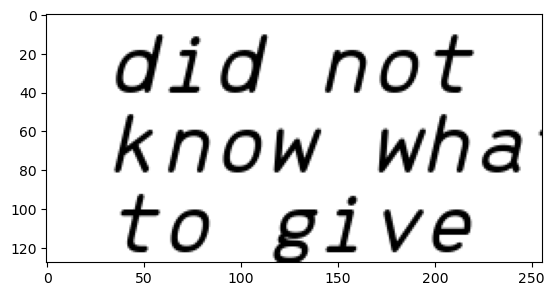

In [24]:
# Выводим изображение

text = "AA cc"
font_path = "fonts/Brass Mono/BrassMono-Italic.ttf"
font_size = 48
img = create_img(chunks[5], font_path, font_size, lines=3, 
                 #shift=0.2
                 )

plt.imshow(img, cmap='gray')
plt.show()

In [25]:
glyphs = get_glyphs(font_paths[0])
print(glyphs)

['!', '"', '#', '$', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '\xa0', '¡', '¢', '£', '¥', '¦', '¨', '¯', '´', '·', '¸', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'à', 'á', 'â', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'ÿ', 'Ā', 'ā', 'Ć', 'ć', 'Ĉ', 'ĉ', 'Ċ', 'ċ', 'Č', 'č', 'Ď', 'ď', 'Ē', 'ē', 'Ė', 'ė', 'Ě', 'ě', 'Ĝ', 'ĝ', 'Ġ', 'ġ', 'Ĥ', 'ĥ', 'Ĩ', 'ĩ', 'Ī', 'ī', 'İ', 'Ĵ', 'ĵ', 'Ĺ', 'ĺ', 'Ľ', 'ľ', 'Ń', 'ń', 'Ň', 'ň', 'Ō', 'ō', 

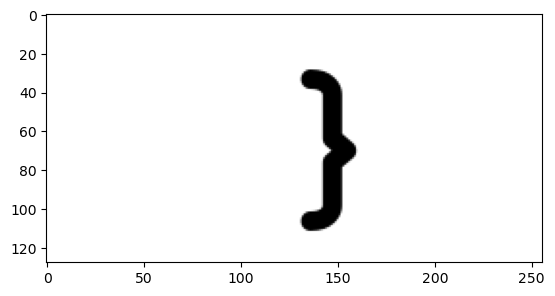

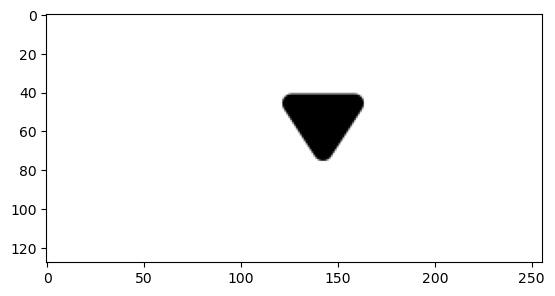

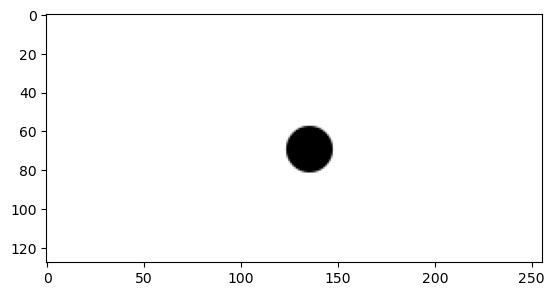

In [26]:
glyphs = get_glyphs(font_paths[5])

for glyph in random.sample(glyphs, 3):
    font_path = font_paths[5]
    font_size = 100
    img = create_img(glyph, font_path, font_size, shift=0.1)

    plt.imshow(img, cmap='gray')
    plt.show()

In [27]:
DS_PATH='dataset'
TEST_DS_PATH='test_dataset'

In [28]:
def process_glyphs(i, glyph, font_path, font_ds_path, font_size, shift=None):
    img = create_img(glyph, font_path, font_size, shift=shift)
    img.save(f'{font_ds_path}/glyphs/{font_size}_{i}.png')

def process_multi_glyphs(
        i, 
        glyphs, 
        font_path, 
        font_ds_path, 
        font_size, 
        q_glyphs = 2,
        q_glyphs_words = 8,
        lines = 4,
        shift=None
        ):
    """
    """
    text = ' '.join([''.join(random.sample(glyphs, q_glyphs)) for _ in range(q_glyphs_words)])
    img = create_img(text, font_path, font_size, shift=shift, lines=lines)
    img.save(f'{font_ds_path}/glyphs/{q_glyphs*q_glyphs_words}_{font_size}_{i}.png')

def process_text_chunks(i, chunk, font_path, font_ds_path, lines, font_size, shift=None):
    img = create_img(chunk, font_path, font_size, lines, shift=shift)
    img.save(f'{font_ds_path}/text/font_size_{font_size}_lines_{lines}_{i}.png')

In [15]:
#For train ds
with open("texts/J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
    words = text_r.split()

for font_path in font_paths:
    font_name = get_font_name(font_path)
    font_ds_path = DS_PATH + '/' + font_name
    os.makedirs(font_ds_path, exist_ok=True)

    os.makedirs(font_ds_path + '/glyphs', exist_ok=True)
    glyphs = get_glyphs(font_path)
    Parallel(n_jobs=-1)(delayed(process_glyphs)(i, glyph, font_path, font_ds_path, 100)
                         for i, glyph in enumerate(tqdm(glyphs, desc='Processing glyphs')))
    
    Parallel(n_jobs=-1)(delayed(process_multi_glyphs)(
                        i, 
                        glyphs, 
                        font_path, 
                        font_ds_path, 
                        font_size= 12 , 
                        q_glyphs = 4,
                        q_glyphs_words = 20,
                        lines = 6,
                        shift=0.3
                        ) for i in tqdm(range(len(glyphs)), desc='Processing multi_glyphs')

                        )
    
    Parallel(n_jobs=-1)(delayed(process_multi_glyphs)(
                        i, 
                        glyphs, 
                        font_path, 
                        font_ds_path, 
                        font_size= 30 , 
                        q_glyphs = 4,
                        q_glyphs_words = 15,
                        lines = 4,
                        shift=0.3
                        ) for i in tqdm(range(len(glyphs)), desc='Processing multi_glyphs')
                        )
    


    os.makedirs(font_ds_path + '/text', exist_ok=True)
    
    

    # 10 шрифт
    chunk_lenth = 55
    font_size = 10
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 9, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
    
    # 12 шрифт
    chunk_lenth = 44
    font_size = 12
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 8, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
    
    # 16 шрифт
    chunk_lenth = 34
    font_size = 16
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 7, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
    
    # 20 шрифт
    chunk_lenth = 24
    font_size = 20
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 6, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))

    # 24 шрифт
    chunk_lenth = 16
    font_size = 24
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 5, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
    chunks = random.sample(chunks, 3000)
    # 32 шрифт
    chunk_lenth = 12
    font_size = 32
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]
    chunks = random.sample(chunks, 3000)
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 4, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
        
    # 36 шрифт
    chunk_lenth = 12
    font_size = 36
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]
    chunks = random.sample(chunks, 3000)
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 4, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))
    
    # 48 шрифт
    chunk_lenth = 6
    font_size = 48
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words)//2, chunk_lenth)]
    chunks = random.sample(chunks, 3000)
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(
        i, 
        chunk, 
        font_path, 
        font_ds_path, 
        lines = 3, 
        font_size = font_size
        ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))


    

Processing text chunks font 48: 100%|██████████| 3000/3000 [00:03<00:00, 847.23it/s]


In [29]:
#For test ds
with open("texts/chamber_secrets.txt", 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
    words = text_r.split()

for font_path in font_paths:
    font_name = get_font_name(font_path)

    print(font_name)
    font_ds_path = TEST_DS_PATH + '/' + font_name
    os.makedirs(font_ds_path, exist_ok=True)

    os.makedirs(font_ds_path + '/text', exist_ok=True)
    
    
    generation_params = [ 
        (10, 55, 9), #font, chunk_lenth, lines
        (12, 44, 8),
        (16, 34, 7),
        (20, 24, 6),
        (24, 16, 5),
        (32, 12, 4),
        (36, 12, 4),
        (48, 6, 3),
    ]
    for param in generation_params:
    
        chunk_lenth = param[1]
        font_size = param[0]
        lines = param[2]
        chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words)//2, chunk_lenth)]
        chunks = random.sample(chunks, 300)
        Parallel(n_jobs=-1)(delayed(process_text_chunks)(
            i, 
            chunk, 
            font_path, 
            font_ds_path, 
            lines = lines, 
            font_size = font_size
            ) for i, chunk in enumerate(tqdm(chunks, desc=f'Processing text chunks font {font_size}')))


    

Aguante-Regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 976.26it/s] 


GhastlyPanicCyr


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 1064.08it/s]


BrassMono-Regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 646.15it/s]


BrassMono-Italic


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 526.00it/s]


BrassMono-BoldItalic


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 571.57it/s]


BrassMono-Bold


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 543.74it/s]


better-vcr-5.2


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 754.78it/s]


AlumniSansCollegiateOne-Italic


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 750.36it/s]


AlumniSansCollegiateOne-Regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 869.90it/s]


GaneshaType-Regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 933.88it/s] 


TanaUncialSP


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 1173.58it/s]


Realest-Extended


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 1093.11it/s]


ArefRuqaaInk-Regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 1020.60it/s]


ArefRuqaaInk-Bold


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 626.36it/s]


ambidexter_regular


Processing text chunks font 48: 100%|██████████| 300/300 [00:00<00:00, 914.79it/s]
